calculate point cloud

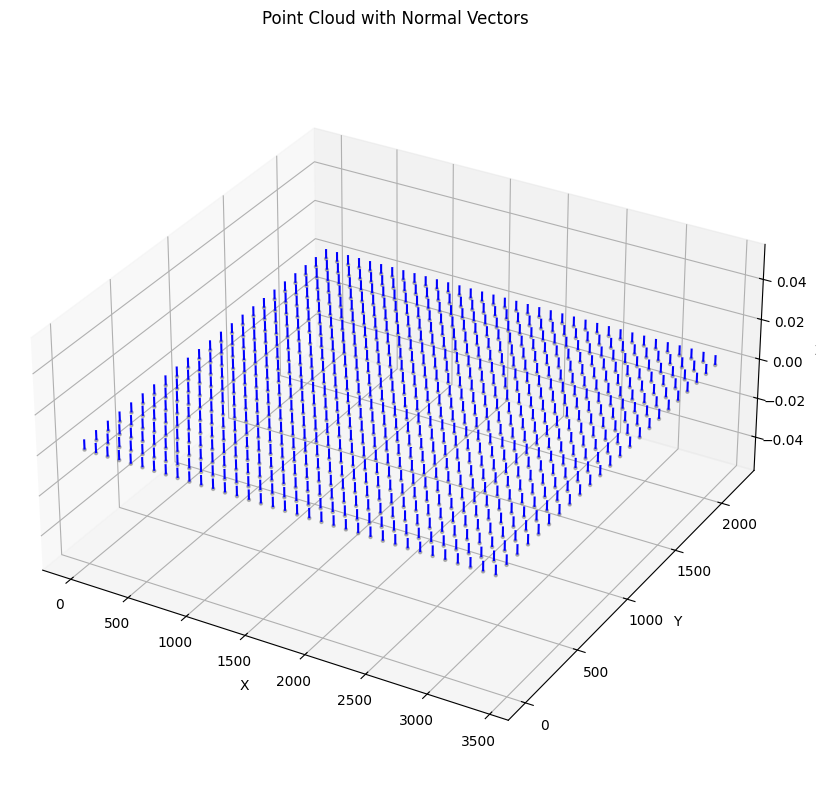

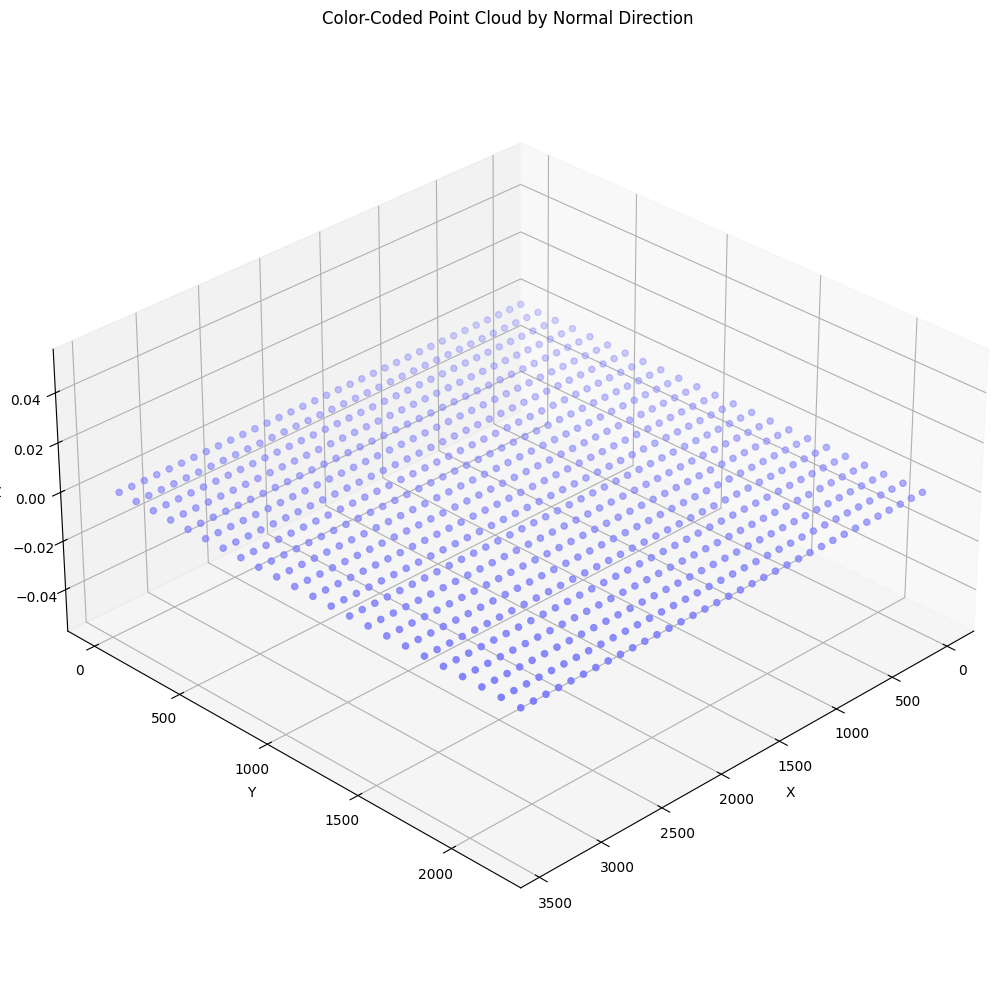

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

# Step 1: Load the four phase images as PNG files
# Replace these with your actual file paths
phi_h_r = np.array(Image.open('phi_h_r.png').convert('L'))  # Horizontal reference
phi_v_r = np.array(Image.open('phi_v_r.png').convert('L'))  # Vertical reference
phi_h_o = np.array(Image.open('phi_h_r.png').convert('L'))  # Horizontal object
phi_v_o = np.array(Image.open('phi_v_r.png').convert('L'))  # Vertical object

# Parts a and b: Calculate and plot as before
# [previous code for parts a and b]

# Part b: Calculate and plot rho_v and rho_h
rho_v = -(phi_v_o - phi_v_r)
rho_h = -(phi_h_o - phi_h_r)

# Part c: Calculate surface normal map
# Calculate denominator
denominator = np.sqrt(rho_v**2 + rho_h**2 + 1)

# Calculate normal vector components
nx = rho_v / denominator
ny = rho_h / denominator
nz = 1 / denominator

# Create a point cloud with normal vectors
# First, create a flat grid for the point cloud
height, width = phi_h_o.shape
y, x = np.mgrid[0:height, 0:width]
z = np.zeros_like(x)  # Flat surface at z=0

# Create point cloud visualization with normal vectors
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

### this part need to crop !!
# Subsample for better visualization (adjust step as needed)
step = 100
x_sub = x[::step, ::step]
y_sub = y[::step, ::step]
z_sub = z[::step, ::step]
u_sub = nx[::step, ::step]
v_sub = ny[::step, ::step]
w_sub = nz[::step, ::step]

# Plot the point cloud (flat surface)
ax.scatter(x_sub, y_sub, z_sub, c='gray', s=5, alpha=0.5)

# Plot normal vectors as arrows
ax.quiver(x_sub, y_sub, z_sub, u_sub, v_sub, w_sub, length=0.005, normalize=True, 
          color='b', arrow_length_ratio=0.01)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Point Cloud with Normal Vectors')

# Set equal aspect ratio
ax.set_box_aspect([1, 1, 0.5])

# Add a second visualization with color-coded normals
fig2 = plt.figure(figsize=(12, 10))
ax2 = fig2.add_subplot(111, projection='3d')

# Color points based on normal direction
# Convert normal vectors to RGB colors
colors = np.zeros((x_sub.shape[0], x_sub.shape[1], 3))
colors[:,:,0] = (u_sub + 1) / 2  # R channel from x component
colors[:,:,1] = (v_sub + 1) / 2  # G channel from y component
colors[:,:,2] = (w_sub + 1) / 2  # B channel from z component

# Reshape for scatter plot
colors_flat = colors.reshape(-1, 3)
x_flat = x_sub.flatten()
y_flat = y_sub.flatten()
z_flat = z_sub.flatten()

# Plot color-coded point cloud
ax2.scatter(x_flat, y_flat, z_flat, c=colors_flat, s=20)

# Set labels and title
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Color-Coded Point Cloud by Normal Direction')

# Set equal aspect ratio
ax2.set_box_aspect([1, 1, 0.5])

# Adjust viewing angle for better visualization
ax2.view_init(elev=30, azim=45)

plt.tight_layout()
plt.savefig('point_cloud_with_normals.png')

# Save the second visualization
fig2.savefig('color_coded_point_cloud.png')

plt.show()